Step 1 - Load the dataset

In [13]:
import pandas as pd

# Load the dataset
df = pd.read_csv('customer_data_small.csv')

# Inspect the dataset
print(df.head())  # View first few rows of the dataset
print(df.isnull().sum())  # Checking for missing values
print(df.dtypes)  # Check data types



   Customer ID  Age  Annual Income  Spending Score
0            1   61         137112              99
1            2   46          50358              49
2            3   30          33267              99
3            4   29         112745              36
4            5   48         119588              82
Customer ID       0
Age               0
Annual Income     0
Spending Score    0
dtype: int64
Customer ID       int64
Age               int64
Annual Income     int64
Spending Score    int64
dtype: object


Step 2 - Data preprocessing (Standardization)

In [14]:
from sklearn.preprocessing import StandardScaler

# Standardizing the data (only the relevant features)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['Age', 'Annual Income', 'Spending Score']])

# Checking the scaled data
print(scaled_data[:5])  # View first 5 rows of scaled data


[[ 1.08646414  1.73171614  1.36749262]
 [ 0.05826464 -0.79727244 -0.19179201]
 [-1.03848149 -1.29549665  1.36749262]
 [-1.10702813  1.02138734 -0.59720601]
 [ 0.1953579   1.22086942  0.83733584]]


Step 3: Finding the Optimal Number of Clusters (Elbow Method)

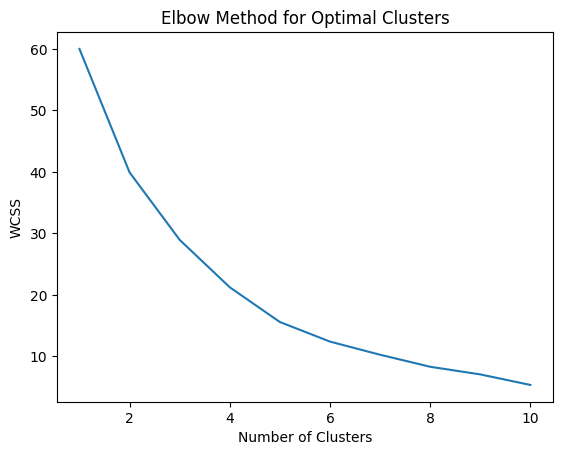

In [15]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Finding the optimal number of clusters using the Elbow Method
wcss = []  # List to store WCSS values for different number of clusters
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


Step 4: Evaluating Clustering with Silhouette Score

In [16]:
from sklearn.metrics import silhouette_score

# Silhouette Score for different values of clusters
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_data)
    print(f'For n_clusters={i}, Silhouette Score: {silhouette_score(scaled_data, kmeans.labels_)}')


For n_clusters=2, Silhouette Score: 0.2565188197821542
For n_clusters=3, Silhouette Score: 0.26085269074148776
For n_clusters=4, Silhouette Score: 0.29153701605089194
For n_clusters=5, Silhouette Score: 0.32708778250128223
For n_clusters=6, Silhouette Score: 0.30467768246563076
For n_clusters=7, Silhouette Score: 0.2808294831673732
For n_clusters=8, Silhouette Score: 0.2658930739122768
For n_clusters=9, Silhouette Score: 0.2578833319677698
For n_clusters=10, Silhouette Score: 0.2739109240051257


Step 5: Apply K-Means Clustering (with chosen number of clusters)

In [17]:
# Applying KMeans with the optimal number of clusters (Assuming 4 clusters)
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
df['Cluster'] = kmeans.fit_predict(scaled_data)

# Displaying the resulting dataset with clusters
print(df.head())  # View the updated dataset with the 'Cluster' column


   Customer ID  Age  Annual Income  Spending Score  Cluster
0            1   61         137112              99        3
1            2   46          50358              49        0
2            3   30          33267              99        2
3            4   29         112745              36        1
4            5   48         119588              82        3


Step 6: Visualizations - PCA for 2D Scatter Plot

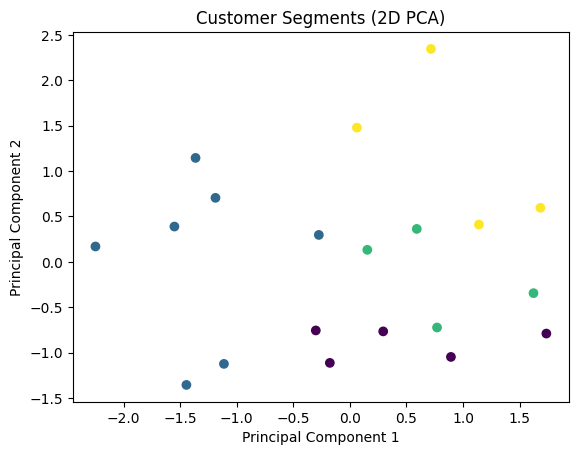

In [18]:
from sklearn.decomposition import PCA

# Apply PCA to reduce the data to 2 components for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Plotting the 2D Scatter Plot
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df['Cluster'], cmap='viridis')
plt.title('Customer Segments (2D PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


Step 7: Visualizations - Pair Plot

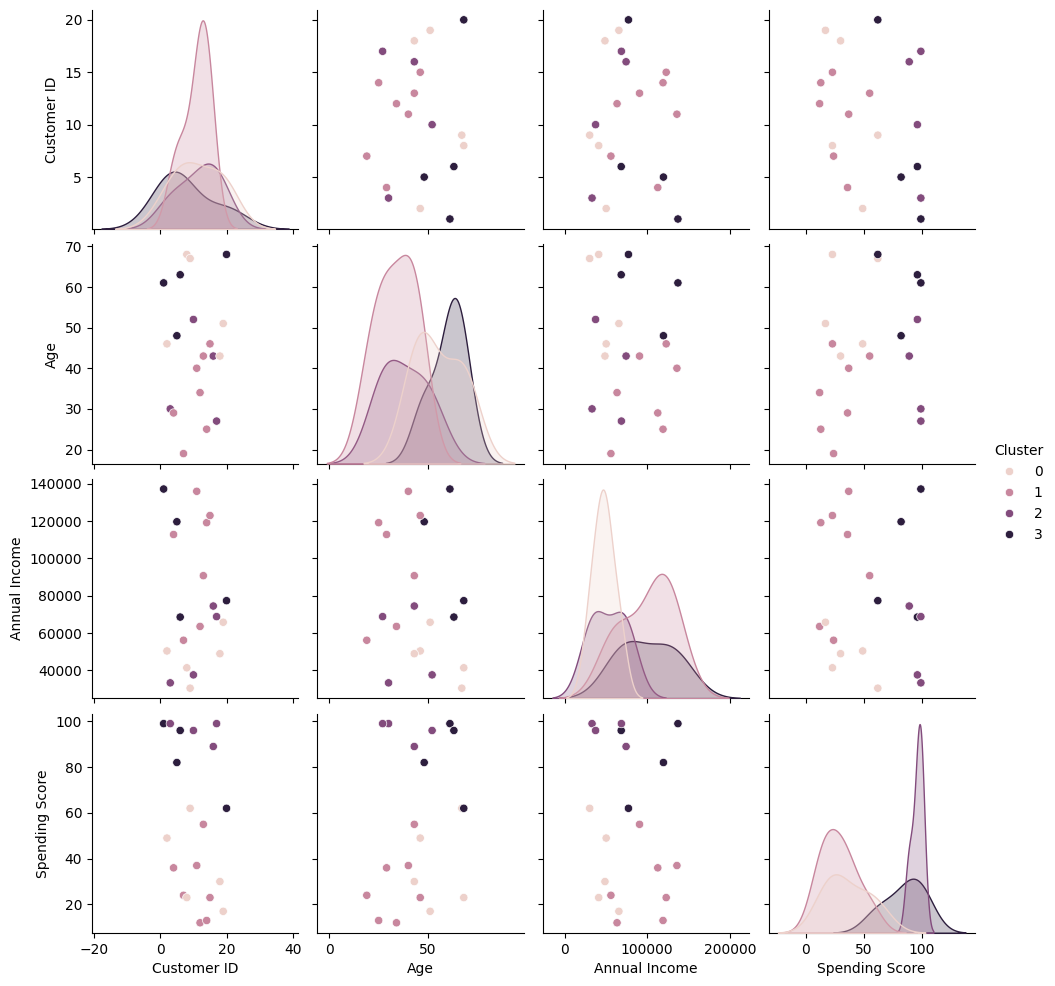

In [19]:
import seaborn as sns

# Pair Plot for visualizing relationships between features
sns.pairplot(df, hue='Cluster')
plt.show()


Step 8: Centroid Visualization in 2D PCA

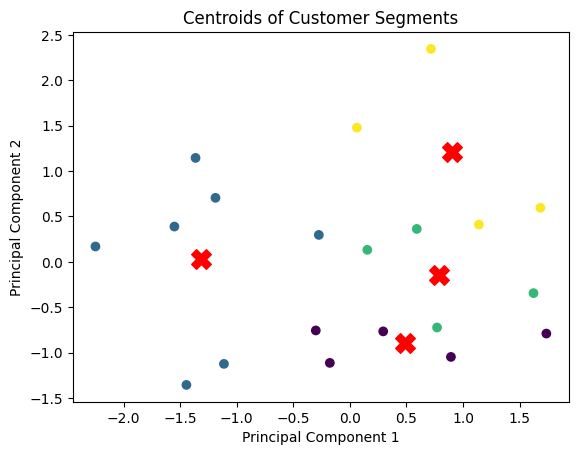

In [20]:
# Visualizing centroids in 2D PCA space
centroids = pca.transform(kmeans.cluster_centers_)
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df['Cluster'], cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X')  # Centroids marked in red
plt.title('Centroids of Customer Segments')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


Step 9: Save the Clustered Dataset

In [21]:
# Save the dataset with assigned cluster labels
df.to_csv('clustered_customer_data.csv', index=False)

# Print the path where the file is saved
print("Clustered dataset saved at: /mnt/data/clustered_customer_data.csv")


Clustered dataset saved at: /mnt/data/clustered_customer_data.csv
